# NETFLIX MOVIE RATE PREDICTION USING GAUSSIAN MIXTURES 

# MOTIVATION: 
* The input is ratings by $n$ users of $d$ movies. However, the data is incomplete in the sense that each movie has not been rated by every user although we assume that each movie has been rated by at least one user. Our task is to fill in the missing ratings. In this case we will use an EM algorithm applied to a Gaussian mixture.
* <span style='color:blue'>The present notebook contains exclussively the parts of the code that I developed for the fulfillment of the project. Functions to upload and prepare the data were pre-programmed by the organizers of the course and provided to us.</span> 

# PREAMBLE: 

* ## The input will be denoted as $X$, which is a $(n,d)$ array and the $i$-th row, $X[i,:]$ is the rating made by the $i$-th user. The missing ratings are in our case set to $0$.  

---
# DEFINING THE GAUSSIAN MIXTURE:
We will assume that, as far as the rating is concerned, the $n$ users may be divide into $K$ clusters. Each cluster has a probability $p_j$ to occur  and within each cluster, say the $j$-th cluster, we will assume that the probability for a user to provide the rating $x=(x_1,\cdots,x_d)$ follows a Gaussian distribution with mean $\mu_j\in\mathbb R^d$ and variance $\sigma_j\in\mathbb R$, that is: 
## $$p(x|j) = \frac{1}{\sqrt[d]{2\pi \sigma_j^2}}\, e^{-\frac{\parallel x-\mu_j\parallel^2}{2 \sigma_j^2}}=:\mathcal N\left(x;\mu_j,\sigma_j\right)$$
where $p(x|j)$ is the conditional probability for having the rating $x$ given that we know it comes from the $j$-th cluster. Thus, the probability for having the rating $x$, disregarding from which cluster that rating has been made, is 
## $$p(x)=\sum_{j= 1}^K p(x|j)\,p_j = \sum_{j=1}^K p_j \mathcal N\left(x;\mu_j,\sigma_j\right)$$

# POSTERIOR PROBABILITY:
Using the Bayes's rule we find that 
## $$p(j|x) = \frac{p(x|j)\,p_j}{p(x)}$$ 
where $p(j|x)$ is the probability that the rating $x$ has been made by an user from the $j$-th cluster. 

# OPTIMIZATION:
Given a set of ratings $S=\left\{x^{(1)},\cdots,x^{(n)}\right\}$ (possibly with missing data), the probability for obtaining the whole set, called the likelihood, is 
## $$ p(S)= \prod_{i=1}^n p\left(x^{(i)}\right)$$ 
where $p\left(x^{(i)}\right) = \sum_j p_j \mathcal N\left(x^{(i)}_{c_i};\mu_{j,c_i},\sigma_j\right)$ and $x^{(i)}_{c_i}$ and $\mu_{j,c_i}$ contain only the  components where $x^{(i)}$ has not missing data. 
Our goal is to find the parameters $\mu_j$, $\sigma_j$ and $p_j$ that maximize the likelihood $p(S)$ 
or equivalently, 
## $$\ln p(S) = \sum_{i=1}^n \ln p\left(x^{(i)}\right)$$
Maximizing this function is a very hard task given the complicated dependence on its parameters. 

## MAXIMIZING A LOWER BOUND OF $\ln p(S)$:
Instead, we will maximize a lower bound of $\ln p(S)$.  By doing so, we make sure to push upwards the true likelihood.  
A lower bound of $\ln P(S)$:
The so-called Jensen's inequality states that for non-negative $q_1,\cdots,q_n$ and $y_1,\cdots,y_n$ with $\sum_a q_a = 1$ it holds that 
## $$\sum_a q_a \ln y_a\leq \ln\left(\sum_a q_a y_a\right)$$
For fixed $i$, let $p(j|i):= p\left(j|x^{(i)}\right)$, that is: the probability that the cluster is the $j$-th one, given the rating $x^{(i)}$. Then, taking $y_j := \frac{p_j\,\mathcal N\left(x^{(i)}_{c_i};\mu_{j,c_i},\sigma_j\right)}{p(j|i)}$ and $q_j := p(j|i)$ the Jensen's inequality states that 
## $$\sum_{j=1}^K p(j|i) \ln \frac{p_j\,\mathcal N\left(x^{(i)}_{c_i};\mu_{j,c_i},\sigma_j\right)}{p(j|i)} \leq \ln\left(\sum_{j=1}^K p_j\,\mathcal N\left(x^{(i)}_{c_i};\mu_{j,c_i},\sigma_j\right)\right) = \ln p\left( x^{(i)}\right)$$ 
Thus, 
## $$\hat l := \sum_{i=1}^n\sum_{j=1}^K p(j|i) \ln \frac{p_j\,\mathcal N\left(x^{(i)}_{c_i};\mu_{j,c_i},\sigma_j\right)}{p(j|i)} \leq \ln P(S)$$ 
It turns out that maximizing the lower bound $\hat l$ is much simpler, at least to find a local maximum for it.  

---
# THE EM ALGORITHM (for maximizing the lower bound $\hat l$):
The EM algorithm guarantees convergence to a local maximum. It is defined as follows:

* **Step 0**: Randomly initialize the parameters $\mu_j$, $\sigma_j$ and $p_j$
Then iterate the following two steps until convergence:

* **E-step:** set $p(j|i)$ as 

## $$p(j|i):= \frac{p_j \mathcal N\left(x^{(i)}_{c_i};\mu_{j,c_i},\sigma_j\right)}{\sum_{l=1}^K p_l \mathcal N\left(x^{(i)}_{c_i};\mu_{l,c_i},\sigma_l\right)}$$ 
    
    (Note that this is the posterior probability corresponding to the current parameters $(\mu_j,\sigma_j,p_j)$. This expression also follows from the vanishing of the gradient of $\hat l$ with respect to $p(j|i)$, subject to the constratint $\sum_{j=1}^K p(j|i)=1$.)
    
* **M-step**: do the following updates: 

## $$ p_j \leftarrow \frac{1}{n} \sum_{i=1}^n p(j|i)$$
## $$\left(\mu_j\right)_l \leftarrow \frac{1}{\sum_{i'=1}^n \delta_{l,c_{i'}} p(j|i')} \sum_{i=1}^n p(j|i)\delta_{l,c_i}\left(x^{(i)}\right)_l$$
##  $$\sigma_j^2 \leftarrow \frac{\sum_{i= 1}^n p(j|i) \parallel x^{(i)}_{c_i}-\mu_{j,c_i}\parallel^2}{\sum_{i'=1}^n p(j|i') \,| c_{i'}|}$$                                                   

Where $()_l$ denotes the $l$-th  component, $\delta_{l,c_i}$ is $1$ if the $l$-th component is not missing, $0$ otherwise, and $|c_i|$ denotes the number of not missing components for the rating $x^{(i)}$.
(These updates follow from the vanishing of the gradient of $\hat l$ with respect to $(\mu_j,\sigma_j,p_j)$.)

# PREDICTING THE MISSING DATA

Once we have optimized the mixture parameters $(\mu_j,\sigma_j,p_j)$, we may compute the missing data as the weighted average of the means $\mu_j$ according to the posterior probability. 

More precisely, suppose that the $i$-th user has not rated the $m$-th movie. Since the probability for the $i$-th user to belong to the $j$-th cluster is $p(j|i)$ and the mean "rating" corresponding to that cluster is $\mu_j$, we may estimate the missing rate as 

## $$\hat x_{im} = \sum_{j= 1}^K p(j|i) \, \left(\mu_j\right)_m$$

where $\left(\mu_j\right)_m$ denotes the $m$-th component of $\mu_j$.

---
# EM ALGORITHM

## Initialize the parameters
A similar version of this function was provided to us by the course organizers. I have modified it to adapt it to the present notebook.

In [4]:
def initial_param(X,K=10,seed=0):
    """
    Initializes the Gaussain mixture parameters
    
    Args:
        X : (n , d) array containing the data
        K : int, number of Gaussian clusters
        seed : int, seed for the random generation, default : 0
    
    Returns:
        mixture : tuple (mu,var,p) -- initial mixture parameters -- 
    """
    
    np.random.seed(seed)
    n,_ = X.shape
    p = np.ones(K)/K
    
    # select K random points as initial means
    mu = X[np.random.choice(n,K,replace=False)]
    # computing variances
    var = np.zeros(K)
    for j in range(K):
        var[j]=((X-mu[j])**2).mean() 
    
    return GaussianMixture(mu,var,p)
"""
The function GaussianMixture generates the tuple (mu,var,p) and was provided for us∫ 
"""

## E-step  

In [5]:
def estep(X,mixture):
    """
    Estimates the posterior probability
    
    Args:
        X : (n, d) np.array containing the ratings
        mixture : GaussianMixture(mu,var,p) -- current mixture parameters --
    Returns: 
        post : (n , K) np.array containing the posterior probabilities : 
                       post[i,j] = p(j|i)
        logl : float, the log-likelihood -- ln(p(S)) -- for X, given the current parameters
    """
    
    mu = mixture.mu # (K , d) np.array
    var = mixture.var # (K, ) np.array
    p = mixture.p # (K, ) np.array
    
    n = X.shape[0]
    K = mu.shape[0]
    
    post = np.zeros((n,K))
    logl = 0
    for i in range(n):
        C_i = X[i,:] != 0 # not missing components
        d_i = np.sum(C_i)
        # argument of the Gaussian 
        exp_arg = ((np.tile(X[i,C_i],(K,1))-mu[:,C_i])**2).sum(axis=1)
        exp_arg = exp_arg/(2*var)
        # log(N(x;mu,var))
        """
        To avoid log(0) evaluations, we add a very small number to p
        """
        logN_i = np.log(p+10**(-16)) - d_i*np.log(2*np.pi*var)/2 - exp_arg 
        logN_max_i = logN_i.max() 
        # log(post[i,:]) 
        """
        For numerical stability, we substract the max value of
        logN_i. The substraction cancels out in the expression below
        """
        log_posti = logN_i - logN_max_i - logsumexp(logN_i-logN_max_i)
        # post[i,:]
        post_i = np.exp(log_posti)
        logl = logl + post_i @ (logN_i - log_posti)
        post[i,:] = post_i
    
    return post, logl

## M-step

In [6]:
def mstep(X,mixture,post,
         min_var = 0.25):
    """
    Updates the mixture parameters
    
    Args:
        X : (n, d) np.array containing the ratings
        mixture : GaussianMixture(mu,var,p) -- current mixture parameters --
        post : (n , K) np.array containing the posterior probabilities : 
                       post[i,j] = p(j|i)
        min_var : float, minimum variance to avoid too narrow Gaussians  
        
    Returns: 
        mixture : GaussMix(mu,var,p) -- updated mixture parameters --
    """
    
    n , d = X.shape 
    K = len(mixture.p)
    p = post.sum(axis=0)/n # sum_i P(j|i)/n
    mu = mixture.mu # (k,d)
    var = mixture.var 
    delta = 1*(X != 0)  # (n,d)
    for j in range(K):
        # updating mu
        mu_numerator = post[:,j] @ X
        mu_denominator = post[:,j] @ delta
        """
        In order to avoid updating components of mu 
        corresponding to too few ratings or very unlikely ratings 
        from the j-th cluster, 
        we demand that \sum_i delta_{l,c_i} p(j|i) >= 1 
        """
        update_indices = mu_denominator >= 1
        mu[j,update_indices] = mu_numerator[update_indices] / mu_denominator[update_indices]
        # updating var
        var[j] = post[:,j] @ ((X-np.tile(mu[j,:],(n,1))*delta)**2).sum(axis=1) / mu_denominator.sum()
        if var[j] <= min_var:
            var[j] = min_var
    return GaussianMixture(mu, var, p) 
    

# COMPLETEING THE RATING MATRIX

In [7]:
def complete_matrix(X,mixture):
    """
    Completes the rating matrix
    
    Args:
        X : (n, d) np.array containing the (incomplete) ratings
        mixture : GaussMix(mu,var,p) -- optimized mixture parameters --
    
    Returns:
        X : (n, d) np.array containing the complete ratings
    """
    
    p = mixture.p # (K,)
    mu = mixture.mu # (K,d) 
    var = mixture.var # (K,)
    n , d = X.shape 
    X_pred = np.zeros((n,d))
    K = len(p)
    for i in range(n):
        C_i = X[i,:] != 0 # not missing components
        d_i = np.sum(C_i)
        # argument of the Gaussian 
        exp_arg = ((np.tile(X[i,C_i],(K,1))-mu[:,C_i])**2).sum(axis=1)
        exp_arg = exp_arg/(2*var)
        # log(N(x;mu,var))
        """
        To avoid log(0) evaluations, we add a very small number to p
        """
        logN_i = np.log(p+10**(-16)) - d_i*np.log(2*np.pi*var)/2 - exp_arg 
        logN_max_i = logN_i.max() 
        # log(post[i,:]) 
        """
        For numerical stability, we substract the max value of
        logN_i. The substraction cancels out in the expression below
        """
        log_posti = logN_i - logN_max_i - logsumexp(logN_i-logN_max_i)
        # post[i,:]
        post_i = np.exp(log_posti)
        unrated_entries = np.logical_not(C_i)
        wieghted_mu = post_i @ mu[:,unrated_entries]
        X_pred[i,unrated_entries] = wieghted_mu
    
    return X+X_pred 

# CALLING THE EM ALGORITHM

In [8]:
def run(X,K=10,seed=0):
    """
    Runs the EM algorithm
    
    Args:
        X : (n , d) array containing the data
        K : int, number of Gaussian clusters
        seed : int, seed for the random generation, default : 0
    
    Returns: 
        mixture : GaussianMixture(mu,var,p) -- optimized mixture parameters --
        logl : list containing the log-likelihoods for all the iterations 
    """
    
    # Initializing the mixture parameters
    mixture = initial_param(X,K=K,seed=seed)
    
    logl_old = None
    logl_new = None
    
    logl = []
    
    # EM algorithm
    
    while (logl_old is None or (logl_new-logl_old >= 10**(-6)*np.abs(logl_new))):
        logl_old = logl_new
        # E-step
        post, logl_new = estep(X,mixture)
        # M-step
        mixture = mstep(X,mixture,post)
        
        if logl_new is not None:
            logl.append(logl_new)
    
    return mixture, logl
        
        
    

## Plotting the log-likelihood of the mixture as a function of the EM algorithm iterations

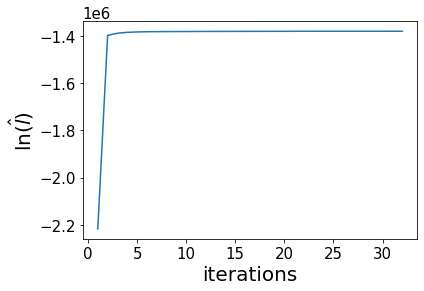

In [10]:
plt.rc('xtick',labelsize = 15)
plt.rc('ytick',labelsize = 15)
plt.plot(range(1,len(logl)+1),logl)
plt.xlabel('iterations', fontsize = 20)
plt.ylabel('$\ln (\hat l)$', fontsize = 20)
plt.show()